In [1]:
import batman
import emcee
import glob
import os
import shutil
import math
import corner
import numba
import itertools

import numpy       as np
import pandas      as pd
import time        as tm 
import lightkurve  as lk
# import mr_forecast as mr

import matplotlib                      as mpl
import matplotlib.pyplot               as plt
import matplotlib.gridspec             as gridspec
from   matplotlib.backends.backend_pdf import PdfPages
import mpl_axes_aligner


import astropy.io.fits    as apf
import astropy.units      as units
from   astropy.stats      import sigma_clip
from   astropy.wcs        import WCS
from   astropy.timeseries import BoxLeastSquares
from   astroquery.mast    import Catalogs
from   astroquery         import svo_fps

from multiprocessing import Pool, Process
from wotan           import flatten
from functools       import partial
from ldtk            import LDPSetCreator, BoxcarFilter, TabulatedFilter, SVOFilter
from ldtk.filters    import tess, sdss_z
from IPython.display import display, HTML
from tqdm.auto       import tqdm


# import eleanor

# import warnings
# warnings.filterwarnings("ignore")
# display(HTML("<style>.container { width:95% !important; }</style>"))

from Functions_all import *
# from Executing_code_part_2_init_single_search import *
# from Executing_code_part_0_just_getting_data import *
# from Executing_code_part_2_init_single_search import *
from Executing_code_part_5_final_singles_search_and_figures import *
import gc



In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;



<IPython.core.display.Javascript object>

In [3]:
target_files = glob.glob('./toi_data/target*check')

len(target_files)

116

380887434
running ticid 380887434
getting star params
catalog df          TICID         RA       DEC    Vmag   Jmag     Tmag    Teff  eTeff_x  \
0  380887434.0  19.471878  5.473931  10.917  7.839  9.16764  3702.0    157.0   

        Rad      eRad  ...  S54  S55  eTeff_y     logg     elogg  M/H  eM/H  \
0  0.485948  0.014338  ...  0.0  0.0    157.0  4.74973  0.007488  NaN   NaN   

           GAIA    aLSM    bLSM  
0  2.564324e+18  0.2315  0.3808  

[1 rows x 80 columns]


  0%|          | 0/1 targets | 00:00<?

PERIODIC SEARCH
running search on all data
depth found 0.0008313832217178172
Candidate: P=13.5815 d, SDE=14.18, SDE2=1.85


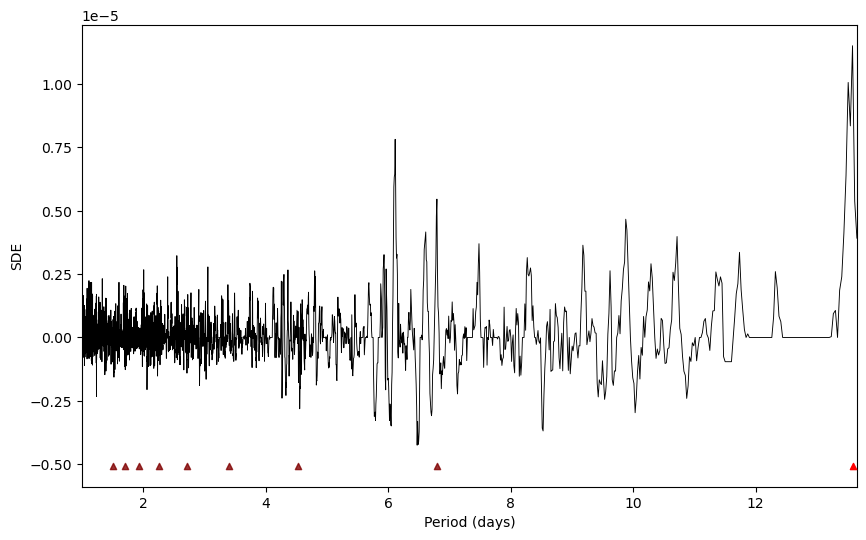

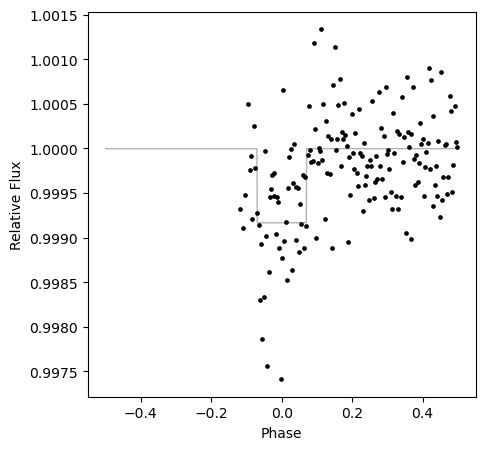

ΔBIC=197.12, (threshold=75)
depths all [0.0008313832217178172]
Accepted planet: P=13.5815 d
depth found 0.0004818635773363699
Candidate: P=13.2180 d, SDE=7.31, SDE2=0.32
Stopping: SDE below threshold.
len(t0s) 1
periodic, period = 13.581510760170989 days
a_smaj_guess 11.981520706639742
N_intran 158 depth 0.00010432087327298105 sig 2.2577117507013913e-05
free vars [t0, Per, rp_rs, a_rs, cosi]
Sampling attempt 1...


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [t0]
>Metropolis: [Per]
>Metropolis: [rp_rs]
>Metropolis: [a_rs]
>Metropolis: [cosi]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 146 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Converged on attempt 1
custom summary                  mean       median      sd   hdi_16%   hdi_84%  r_hat
t0           2447.775  2447.775104   0.008  2447.768  2447.783   1.02
Per            13.515    13.514517   0.010    13.505    13.524   1.01
rp_rs           0.024     0.023667   0.001     0.023     0.025   1.01
a_rs           13.597    13.589901   0.678    12.829    14.153   1.03
cosi            0.010     0.008528   0.008     0.000     0.013   1.01
inclination    89.426    89.511357   0.432    89.276    89.999   1.01
b               0.136     0.114945   0.101     0.000     0.172   1.01
depth           0.001     0.000560   0.000     0.001     0.001   1.01
tau             0.183     0.182344   0.013     0.169     0.194   1.01
dur             7.683     7.676207   0.397     7.221     8.015   1.02
win            15.366    15.352414   0.794    14.443    16.029   1.02
SNR           435.910   435.040251  37.209   398.839   473.921   1.01
norm            1.000     0.999978   0.000     1.000

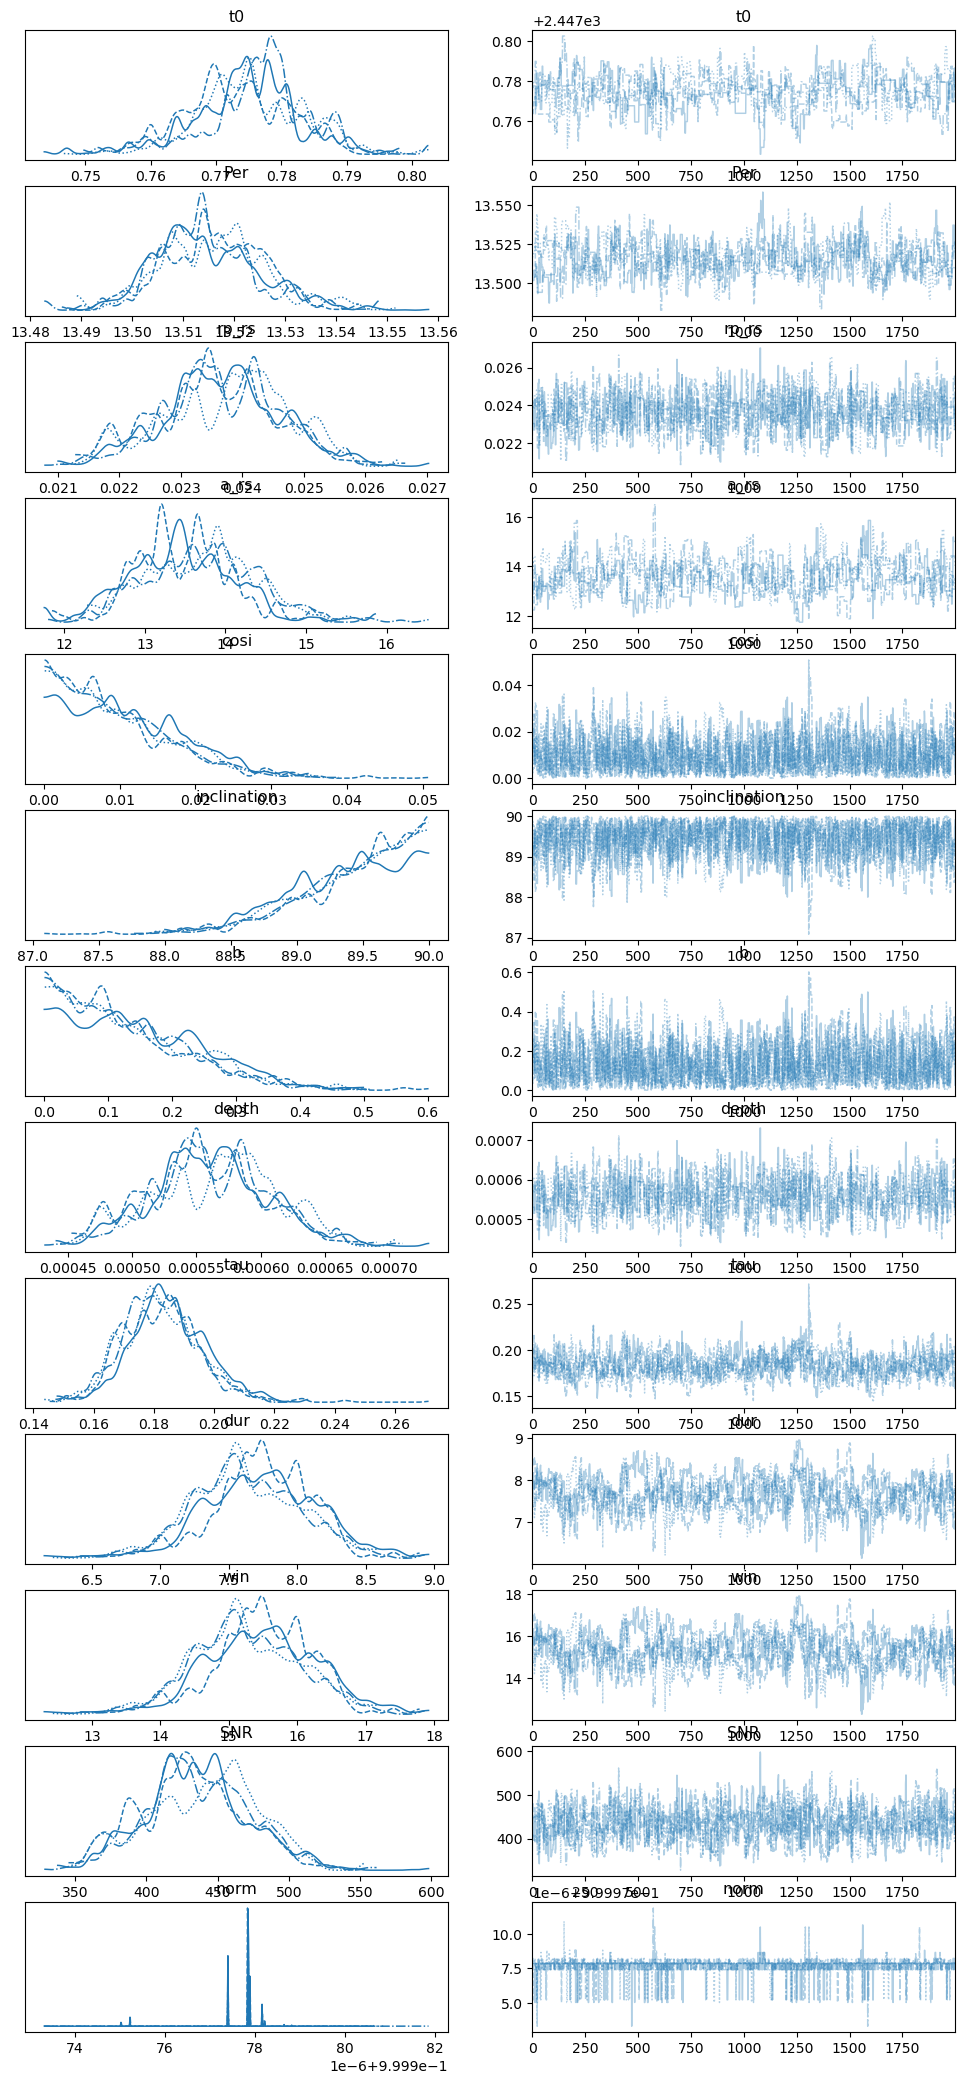

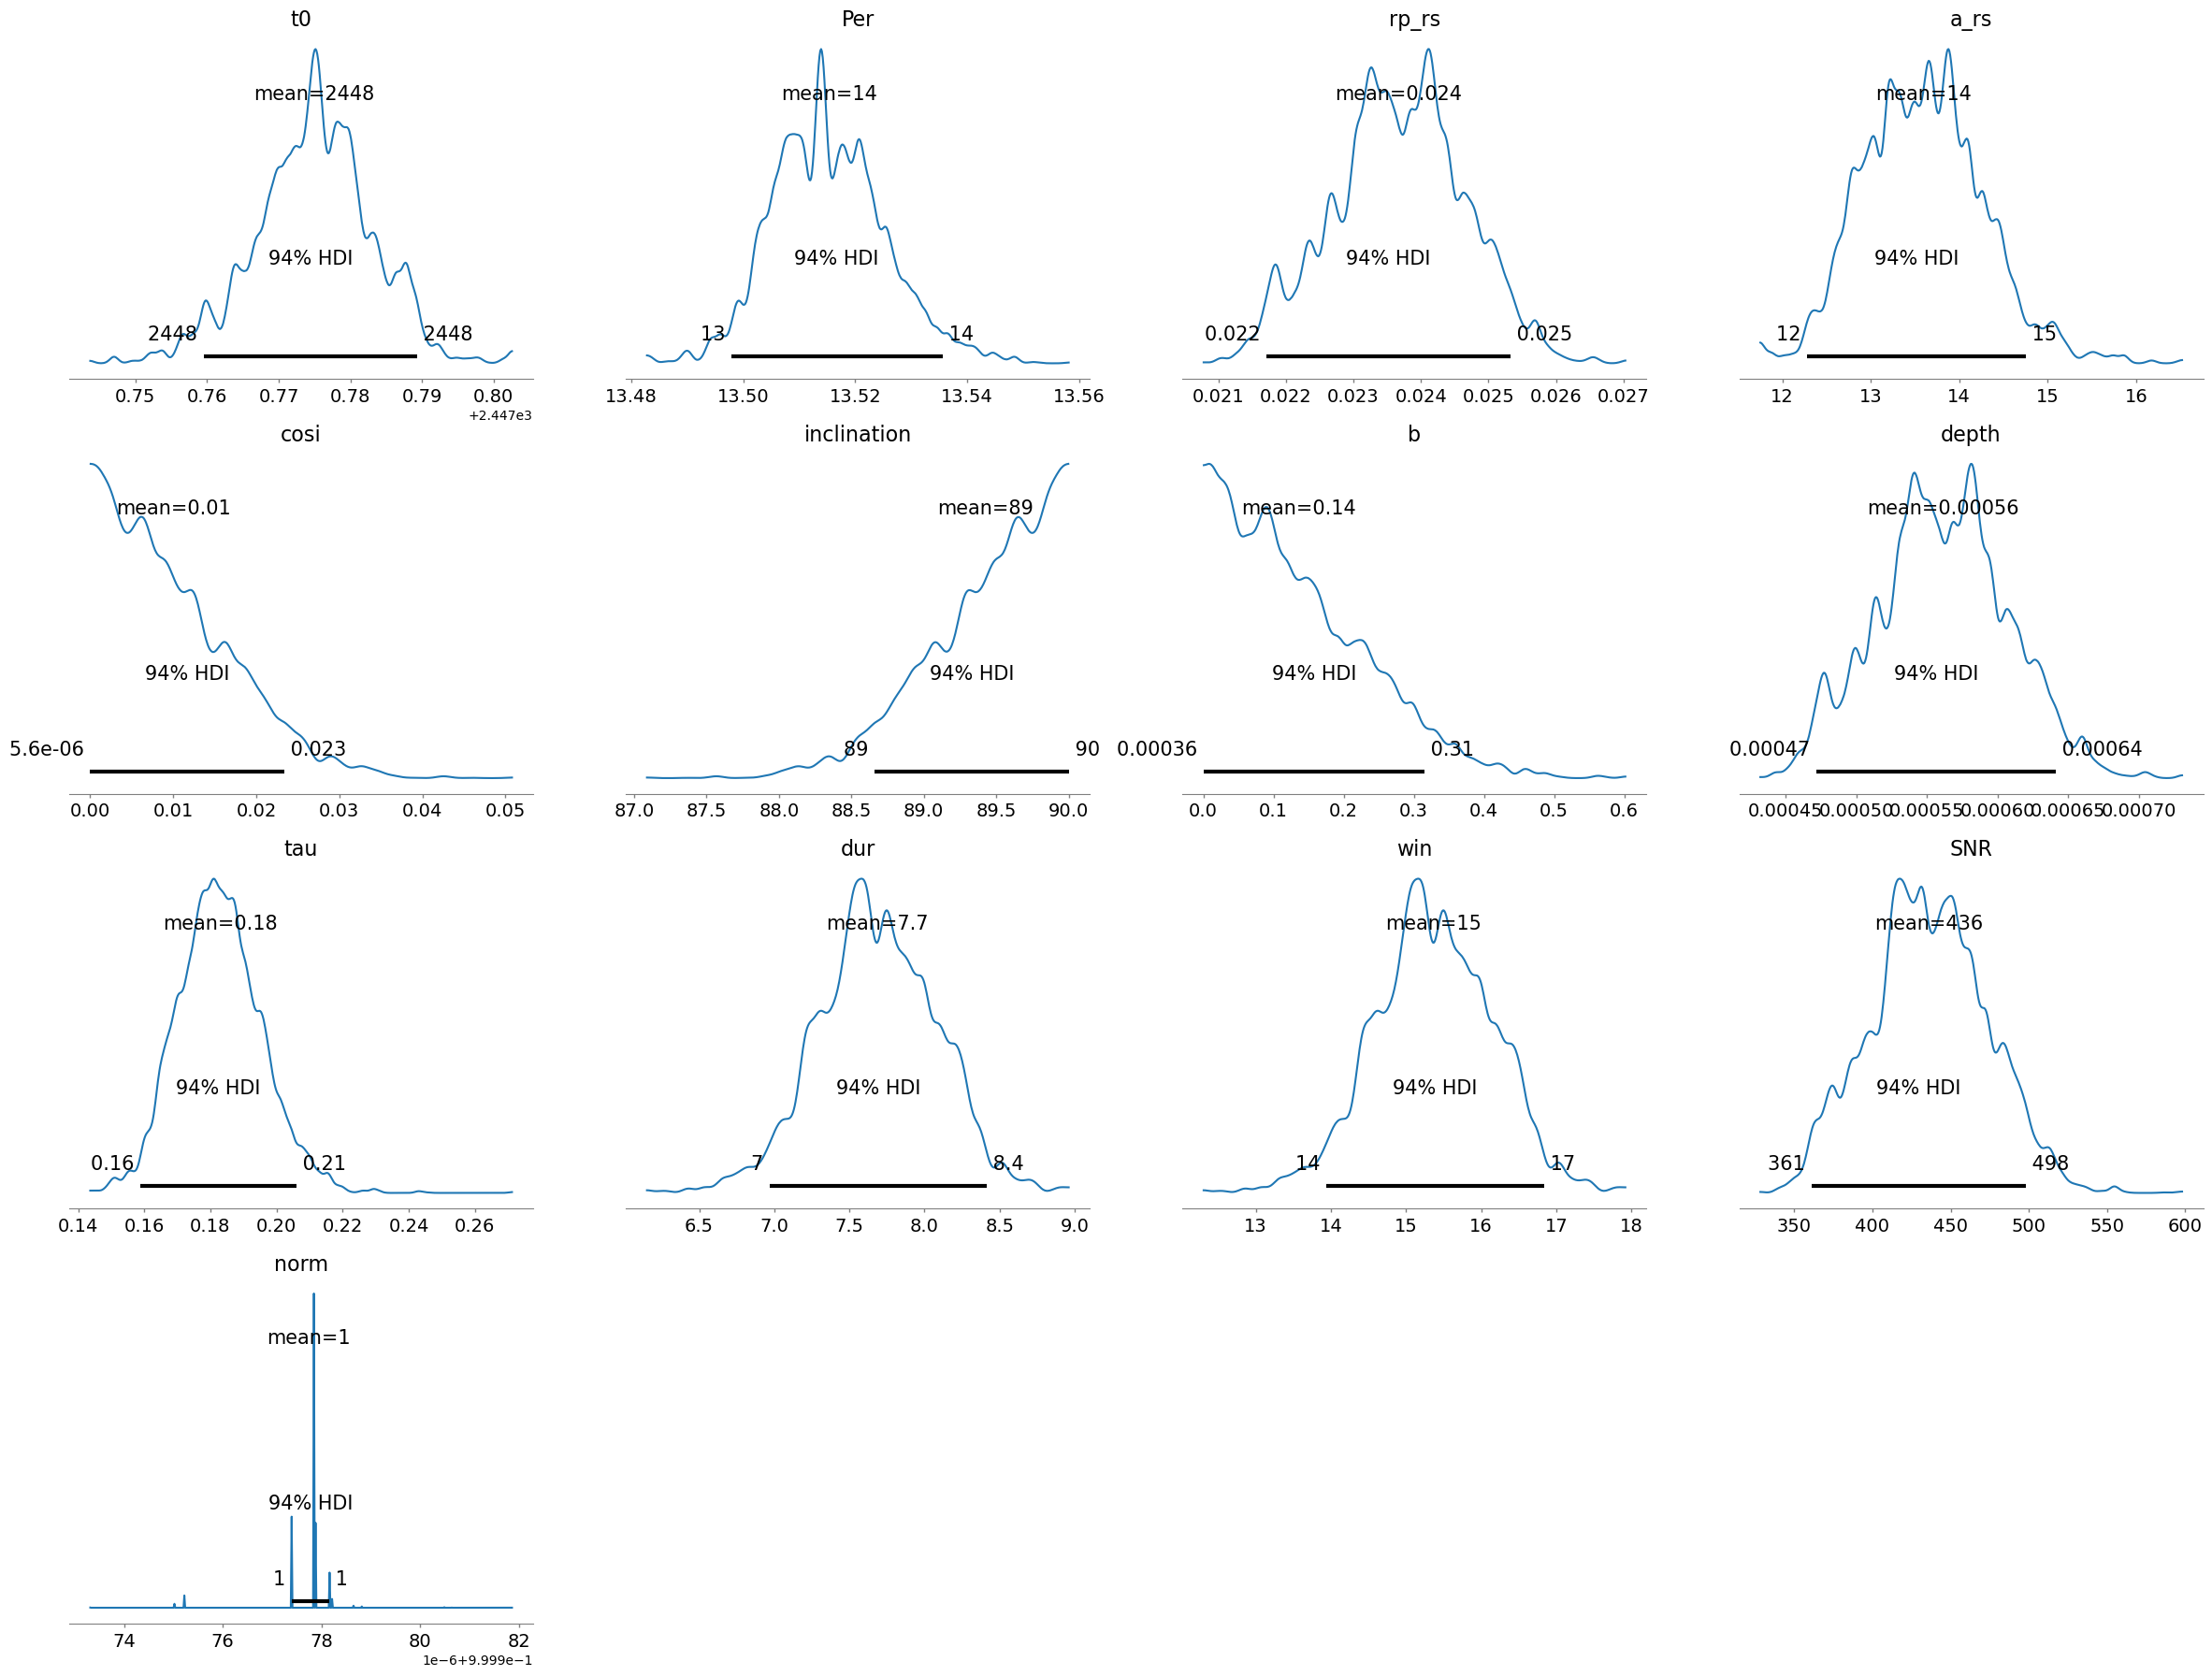

summary                  mean       median      sd   hdi_16%   hdi_84%  r_hat
t0           2447.775  2447.775104   0.008  2447.768  2447.783   1.02
Per            13.515    13.514517   0.010    13.505    13.524   1.01
rp_rs           0.024     0.023667   0.001     0.023     0.025   1.01
a_rs           13.597    13.589901   0.678    12.829    14.153   1.03
cosi            0.010     0.008528   0.008     0.000     0.013   1.01
inclination    89.426    89.511357   0.432    89.276    89.999   1.01
b               0.136     0.114945   0.101     0.000     0.172   1.01
depth           0.001     0.000560   0.000     0.001     0.001   1.01
tau             0.183     0.182344   0.013     0.169     0.194   1.01
dur             7.683     7.676207   0.397     7.221     8.015   1.02
win            15.366    15.352414   0.794    14.443    16.029   1.02
SNR           435.910   435.040251  37.209   398.839   473.921   1.01
norm            1.000     0.999978   0.000     1.000     1.000   1.01
params df   

  0%|          | 0/1 targets | 00:00<?

time len 4326
number singles found 0
params df singles []
singles params df []
periodic params df                  mean       median      sd   hdi_16%   hdi_84%  r_hat
t0           2447.775  2447.775104   0.008  2447.768  2447.783   1.02
Per            13.515    13.514517   0.010    13.505    13.524   1.01
rp_rs           0.024     0.023667   0.001     0.023     0.025   1.01
a_rs           13.597    13.589901   0.678    12.829    14.153   1.03
cosi            0.010     0.008528   0.008     0.000     0.013   1.01
inclination    89.426    89.511357   0.432    89.276    89.999   1.01
b               0.136     0.114945   0.101     0.000     0.172   1.01
depth           0.001     0.000560   0.000     0.001     0.001   1.01
tau             0.183     0.182344   0.013     0.169     0.194   1.01
dur             7.683     7.676207   0.397     7.221     8.015   1.02
win            15.366    15.352414   0.794    14.443    16.029   1.02
SNR           435.910   435.040251  37.209   398.839   473.921

  0%|          | 0/1 targets | 00:00<?

PERIODIC SEARCH
running search on all data
depth found 0.0030935259104235826
Candidate: P=10.8945 d, SDE=68.10, SDE2=16.71


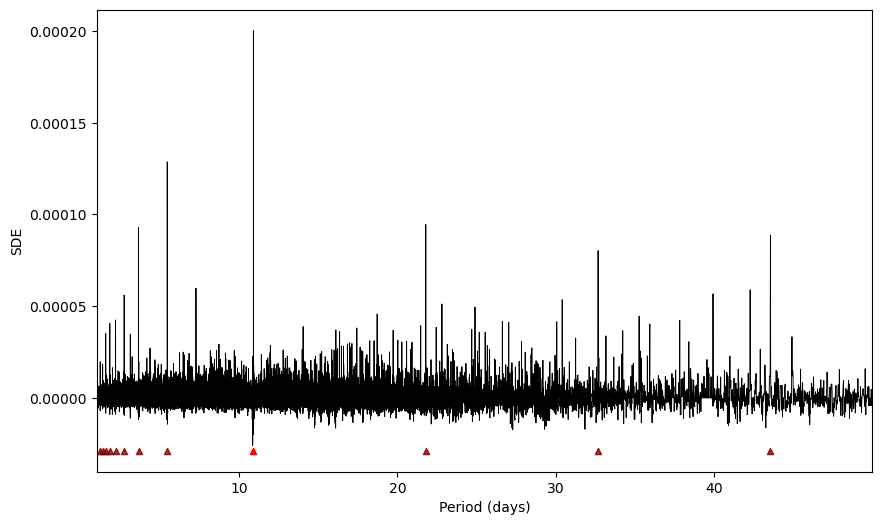

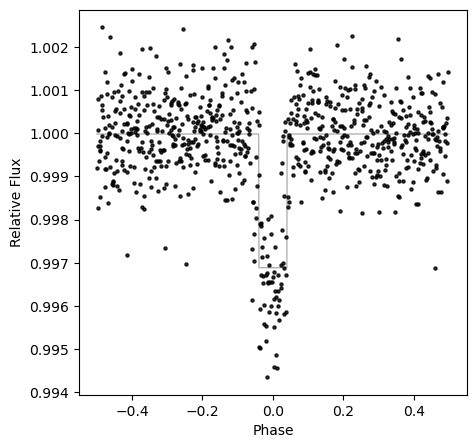

ΔBIC=790.62, (threshold=75)
depths all [0.0030935259104235826]
Accepted planet: P=10.8945 d
depth found 0.0019532232888470496
Candidate: P=18.8014 d, SDE=30.87, SDE2=8.98


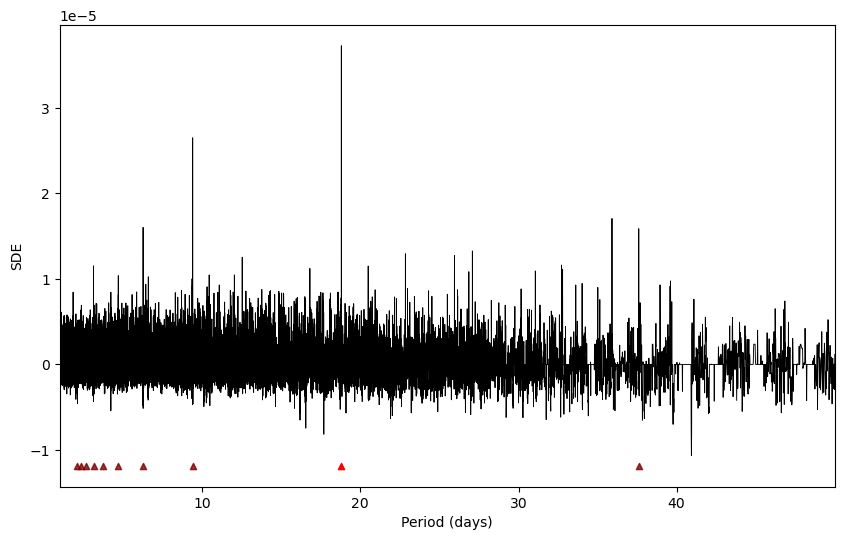

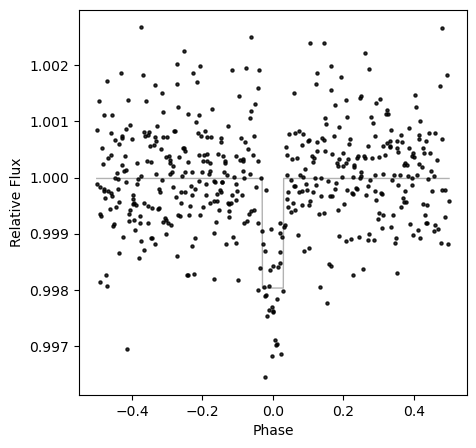

factors [0.57945]
final of periodicity check; period:  18.80136672508574  keep factor 1
ΔBIC=128.25, (threshold=75)
depths all [0.0030935259104235826, 0.0019532232888470496]
Accepted planet: P=18.8014 d
depth found 0.0029880849361344467
Candidate: P=25.5073 d, SDE=10.73, SDE2=0.42


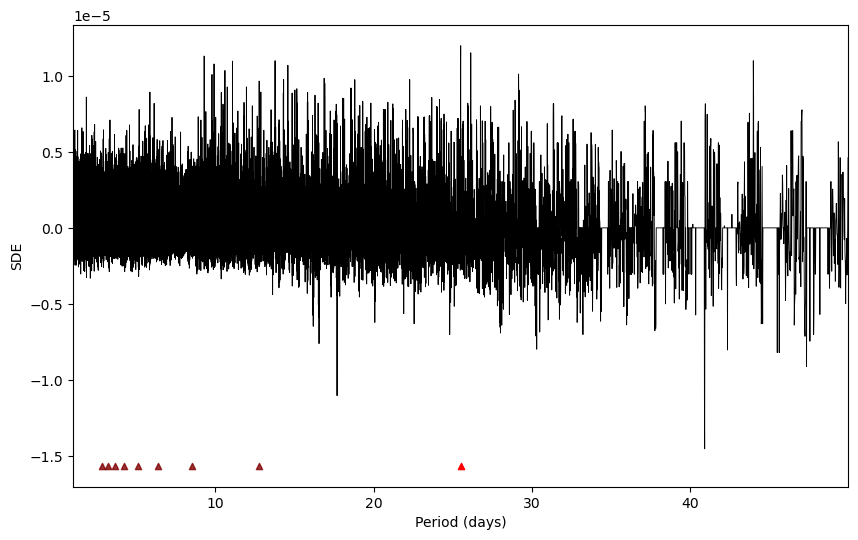

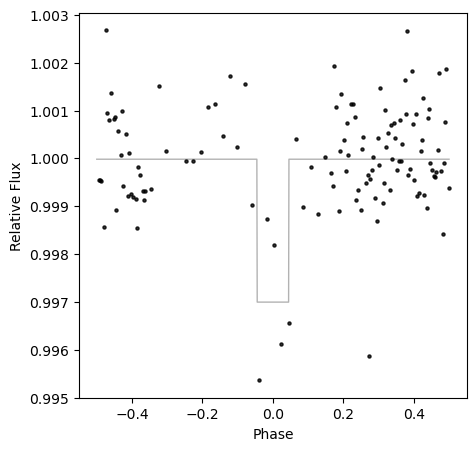

factors [0.42711 0.7371 ]
final of periodicity check; period:  25.50730510971607  keep factor 1
ΔBIC=42.54, (threshold=75)
masking this single transit or repeat detection and continuing
Candidate rejected - masking single event
depth found 0.0035546102704598253
Candidate: P=12.8318 d, SDE=11.82, SDE2=1.58


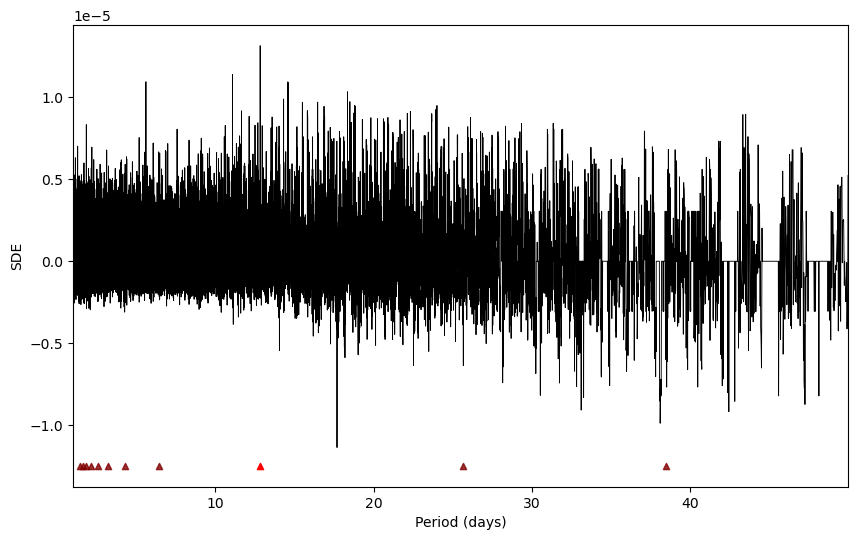

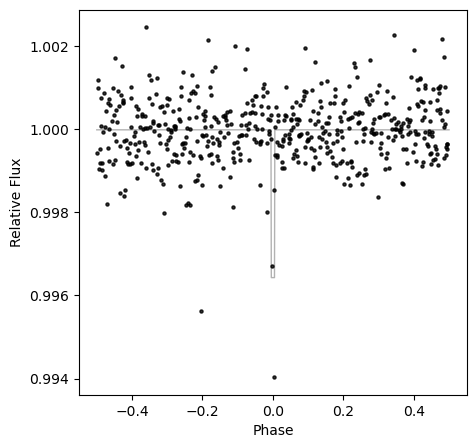

factors [0.84902 1.46522]
final of periodicity check; period:  12.8317963861363  keep factor 1
ΔBIC=33.39, (threshold=75)
depths all [0.0030935259104235826, 0.0019532232888470496, 0.0035546102704598253]
Accepted planet: P=12.8318 d
depth found 0.004228015284595289
Candidate: P=11.9975 d, SDE=11.82, SDE2=1.80


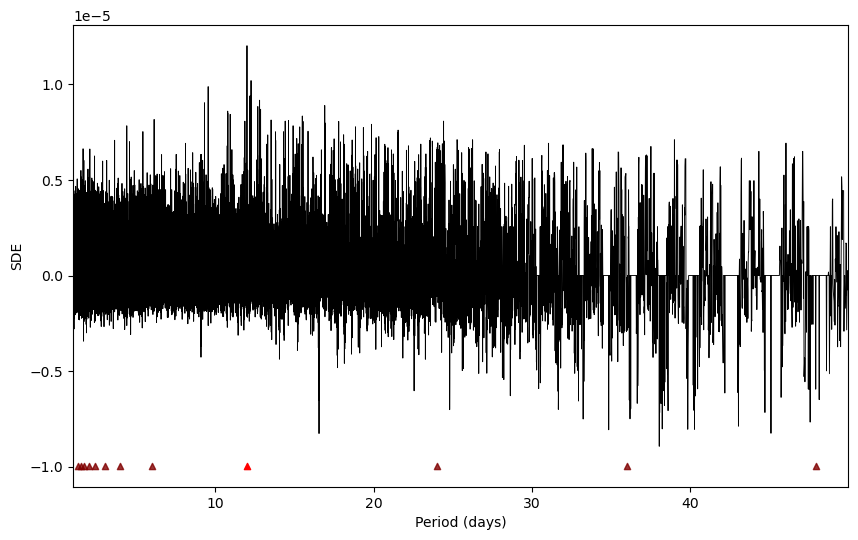

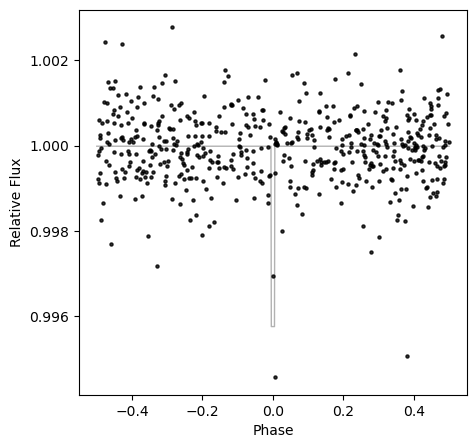

factors [0.90806 1.5671  1.06953]
final of periodicity check; period:  11.997549798349576  keep factor 1
ΔBIC=30.12, (threshold=75)
depths all [0.0030935259104235826, 0.0019532232888470496, 0.0035546102704598253, 0.004228015284595289]
Accepted planet: P=11.9975 d
depth found 0.00376747065774302
Candidate: P=14.4134 d, SDE=9.36, SDE2=0.26
Stopping: SDE below threshold.
len(t0s) 4
periodic, period = 10.894503486004576 days
a_smaj_guess 10.343912767866188
N_intran 365 depth 0.01815305906937891 sig 4.00880869153393e-05
free vars [t0, Per, rp_rs, a_rs, cosi]
Sampling attempt 1...


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [t0]
>Metropolis: [Per]
>Metropolis: [rp_rs]
>Metropolis: [a_rs]
>Metropolis: [cosi]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 225 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


checking nanas summary                  mean       sd    hdi_3%   hdi_97%  mcse_mean  mcse_sd  \
t0           1691.006    0.002  1691.003  1691.009      0.000    0.000   
Per            10.895    0.000    10.895    10.895      0.000    0.000   
rp_rs           0.070    0.005     0.063     0.079      0.001    0.001   
a_rs           15.529    0.698    14.232    16.761      0.122    0.045   
cosi            0.060    0.003     0.054     0.066      0.001    0.000   
inclination    86.541    0.199    86.201    86.918      0.042    0.014   
b               0.935    0.014     0.912     0.960      0.004    0.001   
depth           0.005    0.001     0.004     0.006      0.000    0.000   
tau             1.094    0.239     0.758     1.559      0.068    0.032   
dur             2.986    0.121     2.767     3.212      0.028    0.012   
win             5.971    0.243     5.534     6.423      0.056    0.025   
SNR          3950.652  481.152  3211.421  4842.447    135.083   57.048   
norm           

Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [t0]
>Metropolis: [Per]
>Metropolis: [rp_rs]
>Metropolis: [a_rs]
>Metropolis: [cosi]


Output()

Sampling 4 chains for 0 tune and 6_000 draw iterations (0 + 24_000 draws total) took 454 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


checking nanas summary                  mean       sd    hdi_3%   hdi_97%  mcse_mean  mcse_sd  \
t0           1691.022    0.036  1690.969  1691.080      0.015    0.006   
Per            10.864    0.488    10.866    10.900      0.014    0.137   
rp_rs           0.035    0.017     0.013     0.053      0.006    0.003   
a_rs           13.280    1.897     9.562    15.572      0.624    0.331   
cosi            0.038    0.024     0.000     0.067      0.010    0.002   
inclination    87.816    1.380    86.179    89.998      0.595    0.133   
b               0.528    0.336     0.018     0.891      0.149    0.033   
depth           0.002    0.005     0.000     0.003      0.000    0.002   
tau             0.344    0.211     0.070     0.704      0.095    0.024   
dur             5.229    1.839     3.380     8.703      0.796    0.306   
win            10.459    3.678     6.760    17.405      1.591    0.612   
SNR           965.939  695.267     0.085  1867.134    315.224   71.696   
norm           

Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [t0]
>Metropolis: [Per]
>Metropolis: [rp_rs]
>Metropolis: [a_rs]
>Metropolis: [cosi]


Output()

In [ ]:

# import matplotlib_inline
# %matplotlib ipympl
%matplotlib inline

try:
    file_factor = int(0)
except ValueError:
    
    sys.exit(1)
# file_num +=1000

time1 = tm.time()
# target_files = [glob.glob('./toi_data/target*'+str(x)+'*')[0] for x in [260708537, 235678745, 441738827, 259168516]]
target_files = glob.glob('./toi_data/target*check')

# np.random.seed(42)
# main(target_files[-1])

# with Pool(30) as pool:
#     pool.map(main, target_files)

running_list = list(range(len(target_files)))
np.random.shuffle(running_list)
# # my_file = [x for x in target_files if "201186294" in x]
# # for jjj in bad_target_lst[3:]:
for jjj in np.array(target_files)[np.array(running_list)]:
# #     if "417931300" and "142937186" not in jjj:
# #     try:
    try:
        main(jjj)
    except: 
        continue
# #     except Exception as error:
# #         print(error)
# #     gc.collect()
# #     break

# time_end = tm.time()

print('time it took: ', (time_end-time1)/60, ' minutes')


In [ ]:
import pandas as pd

df = pd.DataFrame({'aLSM':[10], 'bLSM':[2]})

z = df[['aLSM', 'bLSM']].values[0].astype(float)
type(z)
a, b = z
a, b



In [ ]:
pd.read_csv('./PS_2025.08.05_10.28.29.csv', skiprows = 104 )

In [ ]:
for file in glob.glob('./toi_data/target*'):
    new_file = file
#     print(file)
    if '_check' in new_file:
#         print(new_file[:-6])
        new_file = new_file[:-6]
#     if '_data' in new_file:
#         new_file = new_file[:-5]
#     print(new_file ==file)
    print(new_file)
    os.rename(file, new_file)

In [ ]:
# for idx, file in enumerate(glob.glob('./toi_data/target*')):
#     if '200322593' in file:
#         print(idx)
#         break

In [ ]:
return pd.DataFrame(np.nan, index=summary.index, columns=summary.columns)
# import os

# def combine_text_files_skipping_first_line(input_directory, output_filename):
#     """
#     Combines all .txt files in a given directory into a single output file,
#     skipping the first line of each input file.

#     Args:
#         input_directory (str): The path to the directory containing the text files.
#         output_filename (str): The name of the file to which the combined content will be written.
#     """
#     iii = 0
#     with open(output_filename, 'w') as outfile:
#         for filename in os.listdir(input_directory):
#             if filename.endswith(".sh"):  # Process only .txt files
#                 filepath = os.path.join(input_directory, filename)
#                 try:
#                     with open(filepath, 'r') as infile:
#                         if iii>0:
#                             # Skip the first line using next()
#                             next(infile)
#                         # Write the remaining lines to the output file
#                         for line in infile:
#                             outfile.write(line)
#                 except Exception as e:
#                     print(f"Error processing {filename}: {e}")
#             iii+=1
# # Example usage:
# input_dir = 'sector_executable_files'  # Replace with the path to your directory
# output_file = 'run_tois_all.sh' # Name of the output file

# combine_text_files_skipping_first_line(input_dir, output_file)
# print(f"All text files from '{input_dir}' combined into '{output_file}', skipping the first line of each.")

In [ ]:
all_tois = pd.read_csv('./PS_2025.08.05_09.17.28.csv', skiprows = 105)

gaia_ids = [all_tois['gaia_id'][x][9:] for x in range(len(all_tois))]

def mk_target_dir_mv_fits_file(fits_file_with_GAIAid, sector_df):
    gaia_ID = fits_file_with_GAIAid.split('-')[2]
    file_gaia = 'Gaia DR2 '+gaia_ID
    

#     print(gaia_ID, sector_df[sector_df['gaia_id'].astype(str)==gaia_ID]['tic_id'])
    tic_id_index = sector_df[sector_df['gaia_id'].astype(str)==file_gaia]['tic_id'].index
    if len(tic_id_index)>1:
        print(tic_id_index)
    ticid = int(sector_df['tic_id'][tic_id_index[0]][4:])
    mkdir_if_doesnt_exist('./known_toi_data/', 'target_tic-'+str(ticid)+'_gaiaID-'+str(gaia_ID))
    os.rename(fits_file_with_GAIAid, './known_toi_data/target_tic-'+str(ticid)+'_gaiaID-'+str(gaia_ID)+'/'+fits_file_with_GAIAid.split('/')[-1])
    


In [ ]:
iii=0
for file in glob.glob('./known_toi_data/s00*/*/*/*/*/*/*.fits'):
    gaia_id_check = set([g_id for g_id in gaia_ids if str(g_id) in file])
    if len(gaia_id_check)==1:
        mk_target_dir_mv_fits_file(file, all_tois)
        iii+=1
        if iii%10 == 0:
            print(iii)
    elif len(gaia_id_check)>1:
        print('weird', gaia_id_check)

In [ ]:
len(og_target_files)

In [ ]:
og_target_files = [file.split('/')[2][:40] for file in glob.glob('./toi_data/target*')]
og_target_files

In [ ]:
import shutil
og_target_files = [file.split('/')[2][:40] for file in glob.glob('./toi_data/target*')]
for file in glob.glob('./known_toi_data/target*'):
    file_name = file.split('/')[2]
    target_file = file_name[:40]
    if not target_file in og_target_files:
        print(file_name)
        import shutil

        destination_directory = './toi_data/'

        try:
            shutil.copytree(file, destination_directory+'/'+file_name)
            print(f"'{file}' copied to '{destination_directory}' successfully.")
        except FileNotFoundError:
            print(f"Error: Source file '{file}' not found.")
        except Exception as e:
            print(f"An error occurred: {e}")





In [ ]:
bad_ids = [458419328, 34068865, 259168516, 271169413, 388076422, 467179528, 193634953, 233602827, 126606859, 
           70899085, 299798795, 348755728, 54962195, 37749396, 235678745, 408636441, 353475866, 396562848,
           422756130, 29960110, 235683377, 296739893, 321669174, 246965431, 98796344, 260708537, 271971130,
           153065527, 329148988, 289164482, 158588995, 95057860, 441738827, 369327947, 420112589, 307210830, 
           220479565, 377293776, 181804752, 419411415, 243641947, 77156829, 260004324, 166184428, 188589164, 
           201186294, 172370679, 259377017, 343628284, 277634430]

bad_target_lst = [glob.glob('./toi_data/target*'+str(x)+'*')[0] for x in bad_ids]

In [ ]:
ramp_data = [259168516,271169413,388076422,233602827, 126606859, 70899085, 348755728, 54962195,
             37749396, 235678745, 408636441, 396562848, 29960110, 235683377, 296739893, 321669174, 
             153065527, 260708537, 420112589, 220479565, 307210830, 377293776, 166184428,172370679,259377017]


In [ ]:
bad_target_lst

In [ ]:
# bad_target_lst

In [ ]:
# x = [4.6750454658446445, 2.343692671773644]
# y = x
# y.append(4.02938402934)
# print(x, y)

In [ ]:
periodics = [37749396, 54962195, 95057860, 103633434, 142748283,178709444, 201177276, 
 243641947,250111245,260004324,260708537, 261257684, 321669174,360156606,
 369327947, 413248763, 419411415, 455784423,
 458419328, ]
periodics_lst = [glob.glob('./toi_data/target*'+str(x)+'*')[0] for x in periodics]
periodics_lst

In [ ]:
# %matplotlib widget
# df = pd.read_csv('./toi_data/target_tic-34068865_gaiaID-5412250540681250560_data_check/target_tic-34068865_gaiaID-5412250540681250560_TGLC_APER_total.csv')

# fig, ax = plt.subplots(1)
# ax.scatter(df.TIME,df.FLUX, s = 1)

In [ ]:
x = 5
x*=abs(-2)
x

In [ ]:
10**-8.31156965e-05